In [15]:
import pandas as pd
from pathlib import Path
import matplotlib as plt
import numpy as np
import sqlalchemy
import yfinance as yf
import yahoo_fin.stock_info as si
import os

In [2]:
# Using the Pandas read_csv funcion and the Path module, 
# read "sp500_sustainability_scores.csv" file into a Pandas DataFrame
esg_df = pd.read_csv(
    Path("sp500_sustainability_scores.csv")
)

# Review the DataFrame
esg_df.head()

,Unnamed: 0,palmOil,controversialWeapons,gambling,socialScore,nuclear,furLeather,alcoholic,gmo,catholic,...,coal,pesticides,adult,percentile,peerGroup,smallArms,environmentScore,governancePercentile,militaryContract,company_ticker
0,Value,False,False,False,8.65,False,False,False,False,True,...,False,False,False,10.48,Pharmaceuticals,False,0.34,0,False,A
1,Value,False,False,False,12.31,False,False,False,False,False,...,False,False,False,58.47,Transportation,False,11.53,0,False,AAL
2,Value,False,False,False,9.17,False,False,False,False,False,...,False,False,False,5.74,Retailing,False,0.10,0,False,AAP
3,Value,False,False,False,6.86,False,False,False,False,False,...,False,False,False,12.87,Technology Hardware,False,0.65,0,False,AAPL
4,Value,False,False,False,16.92,False,False,False,False,True,...,False,False,False,53.78,Pharmaceuticals,False,1.12,0,False,ABBV


In [3]:
# Create the connection string for your SQLite database
database_connection_string = 'sqlite:///'

# Pass the connection string to the SQLAlchemy create_engine function
engine = sqlalchemy.create_engine(database_connection_string)

# Confirm that the database engine was created.
engine

Engine(sqlite:///)

In [4]:
esg_df.to_sql(
    'esg_score_info', #New table name
    engine, 
    index=False, 
    if_exists='replace'
)

# Confirm that the table was created by calling the table_names function
engine.table_names()

/Users/puntepbhayakaporn/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:9: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  if __name__ == '__main__':


['esg_score_info']

In [5]:
# e_score = 10
# s_score = 10
# g_score = 8

# Create and execute a query to return all columns for the 10 highest credit scores.
# query1 = """
# SELECT company_ticker, environmentScore, socialScore, governanceScore
# FROM esg_score_info
# WHERE environmentScore >= """+str(e_score)+""" AND socialScore >= """+str(s_score)+""" AND governanceScore >= """+str(g_score)+""";
# """

## , environmentScore, socialScore, governanceScore

# Call on the database engine to execute the query
# results = engine.execute(query1)

# List of the results of the database query
# list(results)

# Create a custom index for FILTERED stock in the S&P500

In [6]:
e_score = 10
s_score = 10
g_score = 8

# Create and execute a query to return esg data for tickers that match the chosen criteria.
query1 = """
SELECT company_ticker, environmentScore, socialScore, governanceScore
FROM esg_score_info
WHERE environmentScore >= """+str(e_score)+""" AND socialScore >= """+str(s_score)+""" AND governanceScore >= """+str(g_score)+""";
"""

# read in your SQL query results using pandas
esg_df = pd.read_sql(query1, con=engine)

# return your first five rows
esg_df.head()

,company_ticker,environmentScore,socialScore,governanceScore
0,CTRA,23.39,14.01,9.28
1,CVX,22.42,10.86,9.95
2,GE,14.09,15.04,11.58
3,MMM,13.20,13.60,8.08
4,MOS,16.30,12.03,8.55


In [7]:
esg_ticker = esg_df['company_ticker']

#Download historical data for S&P 500
sp500_hist_data = yf.download(list(esg_ticker), start="2020-01-01", end="2020-04-30")

#Count the number of column fetched
column_count = (len(sp500_hist_data.columns))/6

#Fetch only the "Adjusted Closing Price" from the data frame
sp500_hist_data_closing = sp500_hist_data.iloc[:,0:int(column_count)]

#Print the data frame to make sure the data is fetched correctly
sp500_hist_data_closing

[*********************100%***********************]  10 of 10 completed


Adj Close                                                \
                 CTRA         CVX         GE         MMM        MOS   
Date                                                                  
2020-01-02  15.914398  108.060585  95.204353  166.588959  21.005358   
2020-01-03  15.960580  107.686829  95.523560  165.154465  20.348631   
2020-01-06  16.089890  107.321968  96.880219  165.311783  20.348631   
2020-01-07  16.182253  105.951530  96.161980  164.645416  20.505463   
2020-01-08  15.563414  104.741257  95.284157  167.172028  20.691696   
...               ...         ...        ...         ...        ...   
2020-04-23  18.630581   78.146156  52.037674  134.786209  11.039924   
2020-04-24  19.002451   78.335228  49.962547  137.279648  11.138232   
2020-04-27  19.606735   80.766037  51.319355  143.489914  11.384000   
2020-04-28  19.095417   80.946098  54.272415  147.188095  11.334846   
2020-04-29  19.309240   85.186516  52.516544  145.927353  11.796892   

                                                                    
                  MRO        NUE         TDG        TSN        XOM  
Date                                                                
2020-01-02  13.302161  52.096638  567.440002  85.615974  61.174900  
2020-01-03  13.370227  51.406689  577.840027  86.196457  60.683086  
2020-01-06  13.574427  50.971920  584.799988  85.787270  61.149017  
2020-01-07  13.409122  50.858501  587.000000  84.540665  60.648567  
2020-01-08  12.913208  50.735638  585.630005  85.064041  59.733963  
...               ...        ...         ...        ...        ...  
2020-04-23   4.728540  36.086983  314.279999  58.297218  38.028343  
2020-04-24   4.816468  36.230492  304.920013  56.459270  38.273403  
2020-04-27   4.738310  38.746628  317.450012  57.129360  38.457199  
2020-04-28   4.875085  38.737061  336.649994  60.116013  39.358677  
2020-04-29   5.715281  40.660046  371.179993  60.594643  41.537975  

[82 rows x 10 columns]

In [8]:
#Create the "Custom_Index" column to calculate the average price of all the filtered stock
sp500_hist_data_closing['custom_index'] = sp500_hist_data_closing.mean(axis=1)

#Select only the average price of all fetch stocks
position_of_avg_price = len(sp500_hist_data_closing.columns)

#Select only date and price
sp500_hist_data_closing_only = sp500_hist_data_closing.iloc[:,int(position_of_avg_price)-1]

#Print the data frame to make sure the data is fetched correctly
sp500_hist_data_closing_only

#Find the division factor to transform the data to base 100 for easy comparison
division_factor_filtered_sp500 = sp500_hist_data_closing_only.iloc[0]

#Transform closing price into base 100 for easy comparison
sp500_hist_data_closing_only = (sp500_hist_data_closing_only/division_factor_filtered_sp500)*100

#Print the data frame to make sure the data is manipulated correctly
sp500_hist_data_closing_only.head()

Date
2020-01-02    100.000000
2020-01-03    100.654686
2020-01-06    101.334435
2020-01-07    101.137907
2020-01-08    100.937799
Name: (custom_index, ), dtype: float64

# Compute the index for ALL stocks in the S&P500

In [9]:
# Fetch the data for ALL S&P 500 as an index for comparison

# Create and execute a query to return the list of tickers for S&P 500
query_all_sp500 = """
SELECT company_ticker
FROM esg_score_info
"""

# read in your SQL query results using pandas
all_sp500_df = pd.read_sql(query_all_sp500, con=engine)
all_sp500_ticker = all_sp500_df['company_ticker']

#Download historical data for S&P 500
all_sp500_hist_data = yf.download(list(all_sp500_ticker), start="2020-01-01", end="2020-04-30")


[*********************100%***********************]  446 of 446 completed


In [10]:
#Count the number of column fetched
all_sp500_column_count = (len(all_sp500_hist_data.columns))/6

#Fetch only the "Adjusted Closing Price" from the data frame
all_sp500_hist_data_closing = all_sp500_hist_data.iloc[:,0:int(all_sp500_column_count)]

#Print the data frame to make sure the data is fetched correctly
all_sp500_hist_data_closing.head()


Adj Close                                                          \
                    A        AAL         AAP       AAPL       ABBV        ABC   
Date                                                                            
2020-01-02  84.799667  28.982893  155.755661  73.894333  80.137344  82.064148   
2020-01-03  83.438141  27.548195  155.765427  73.175926  79.376678  81.032066   
2020-01-06  83.684799  27.219410  153.205490  73.759018  80.003120  82.218468   
2020-01-07  83.941322  27.119778  151.388138  73.412125  79.546715  81.630081   
2020-01-08  84.770073  27.737495  149.648941  74.593033  80.110497  82.421005   

                                                           ...              \
                  ABT         ACN        ADBE         ADI  ...         WTW   
Date                                                       ...               
2020-01-02  84.001152  203.776093  334.429993  116.062126  ...  204.279999   
2020-01-03  82.977104  203.436707  331.809998  114.019028  ...  204.330002   
2020-01-06  83.411865  202.108276  333.709991  112.679428  ...  204.580002   
2020-01-07  82.948135  197.744736  333.390015  115.242958  ...  204.160004   
2020-01-08  83.286263  198.132599  337.869995  116.283783  ...  204.389999   

                                                                               \
                   WY        WYNN        XEL        XOM       XRAY        XYL   
Date                                                                            
2020-01-02  26.965097  142.405029  59.119480  61.174904  55.990776  77.805458   
2020-01-03  27.010973  140.292755  59.403801  60.683083  55.371170  78.263420   
2020-01-06  26.955925  140.015091  59.318501  61.149021  55.676056  77.756729   
2020-01-07  26.781601  140.679504  59.195297  60.648556  55.971104  77.464417   
2020-01-08  26.882526  141.562103  59.138435  59.733963  56.561207  77.727501   

                                               
                  YUM         ZBH         ZTS  
Date                                           
2020-01-02  98.132996  147.066025  132.432312  
2020-01-03  97.825638  146.681580  132.452087  
2020-01-06  97.768005  145.833893  131.435165  
2020-01-07  97.940887  145.705750  131.879471  
2020-01-08  98.113785  147.450424  131.593155  

[5 rows x 446 columns]

In [11]:
#Create the "Custom_Index" column to calculate the average price of ALL stock in S&P500
all_sp500_hist_data_closing['custom_index'] = all_sp500_hist_data_closing.mean(axis=1)

#Select only the average price of all fetch stocks
all_position_of_avg_price = len(all_sp500_hist_data_closing.columns)

#Select only date and price
all_sp500_hist_data_closing_only = all_sp500_hist_data_closing.iloc[:,int(all_position_of_avg_price)-1]

#Find the division factor to transform the data to base 100 for easy comparison
division_factor_all_sp500 = all_sp500_hist_data_closing_only.iloc[0]

#Transform closing price into base 100 for easy comparison
all_sp500_hist_data_closing_only = (all_sp500_hist_data_closing_only/division_factor_all_sp500)*100

#Print the data frame to make sure the data is manipulated correctly
all_sp500_hist_data_closing_only.head()

Date
2020-01-02    100.000000
2020-01-03     99.613046
2020-01-06     99.804257
2020-01-07     99.705379
2020-01-08    100.090797
Name: (custom_index, ), dtype: float64

# Combine the data to plot in a line graph


<AxesSubplot:title={'center':'The Price Index of Stock Filtered'}, xlabel='Date', ylabel='Price Index'>

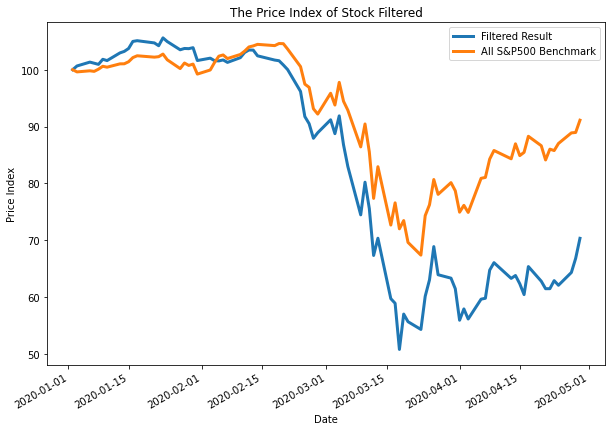

In [26]:
#Plot the filtered data frame
sp500_hist_data_closing_only.plot(
    title="The Price Index of Stock Filtered", 
    xlabel="Date", 
    ylabel="Price Index", 
    figsize=(10,7),
    legend="top",
    label="Filtered Result",
    linewidth=3
)

#Plot the "ALL" S&P500 index data frame
all_sp500_hist_data_closing_only.plot(
    legend="top",
    label="All S&P500 Benchmark",
    linewidth=3
)

In [14]:
# To do
# -------
# table and column name for industry
# integrate the SQL code with streamlit